# Machine Learning: Artificial Neural Networks

Instructions
_____________________________

This file contains code that helps you get started. 
You will need to complete the following functions 
 
    - predict.m
    - sigmoidGradient.m
    - randInitializeWeights.m
    - nnCostFunction.m

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

## Import the required packages

In [1]:
import scipy.io
import numpy as np

from predict import predict
from displayData import displayData
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from nnCostFunction import nnCostFunction
from checkNNGradients import checkNNGradients
from fmincg import fmincg

## Setup the parameters you will use for this exercise

In [2]:
input_layer_size = 400     # 20x20 Input Images of Digits
hidden_layer_size = 25     # 25 hidden units
num_labels = 10            # 10 labels, from 0 to 9
                           # (note that we have mapped "0" to label 9 to follow
                           # the same structure used in the MatLab version)

# =========== Part 1: Loading and Visualizing Data =============
We start the exercise by first loading and visualizing the dataset. 
You will be working with a dataset that contains handwritten digits.

## Load Training Data

Loading and Visualizing Data ...


D:\PYTHON\MachineLearning\lab5\Jupyter\Initial code\displayData.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.sqrt(data.shape[0]), np.sqrt(data.shape[0]), i + 1)


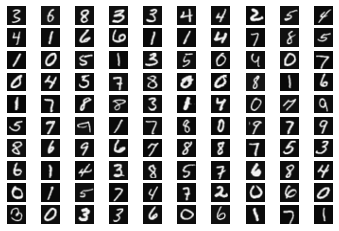

In [3]:
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('digitdata.mat')
X = mat['X']
y = mat['y']
y = np.squeeze(y)
m, _ = np.shape(X)

# Randomly select 100 data points to display
sel = np.random.choice(range(X.shape[0]), 100)
sel = X[sel,:]

displayData(sel)

# ================ Part 2: Loading Pameters ================
In this part of the exercise, we load some pre-initialized neural network parameters.

In [4]:
print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('debugweights.mat')

# Unroll parameters
Theta1 = mat['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = mat['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

Loading Saved Neural Network Parameters ...


# ================= Part 3: Implement Predict =================
After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the neural network to predict the labels of the training set. This lets you compute the training set accuracy.

In [5]:
pred = predict(Theta1, Theta2, X )
print('Training Set Accuracy: ', (pred == y).mean()* 100)

(401,)


NameError: name 'exit' is not defined

##  Testing (you can skip this block)
To give you an idea of the network's output, you can also run through the examples one at the a time to see what it is predicting. Run the code in the following block to view examples.

**NOTE:** to avoid the printing of all the sample instances, you can replace *range(m)* with a small number

In [ ]:
#  Randomly permute examples
rp = np.random.permutation(m)
# testing = range(m)
testing = 10
for i in range(testing):
    print(i)
    # Display 
    print('Displaying Example Image')
    tmp = np.transpose(np.expand_dims(X[rp[i], :], axis=1))
    displayData(tmp)

    pred = predict(Theta1, Theta2, tmp)
    print('Neural Network Prediction: ', pred, '(digit ', pred%10, ')')

# ================ Part 4: Sigmoid Gradient  ================
Before you start implementing backpropagation, you will first implement the gradient for the sigmoid function. You should complete the code in the sigmoidGradient.m file.

In [ ]:
print('Evaluating sigmoid gradient...')
example = np.array([-15, -1, -0.5, 0, 0.5, 1, 15])
g = sigmoidGradient(example)
print('Sigmoid gradient evaluated at', example, ':')
print(g)

# ================ Part 5: Initializing Parameters ================
To learn a two layer neural network that classifies digits. You will start by implementing a function to initialize the weights of the neural network (randInitializeWeights.py)

In [ ]:
print('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_Theta1 = np.reshape(initial_Theta1, initial_Theta1.size, order='F')
initial_Theta2 = np.reshape(initial_Theta2, initial_Theta2.size, order='F')
initial_nn_params = np.hstack((initial_Theta1, initial_Theta2))
print(initial_nn_params)

# =============== Part 6: Implement Backpropagation ===============
Now you will implement the backpropagation algorithm for the neural network. You should add code to nnCostFunction.m to return the partial derivatives of the parameters.

In [ ]:
print('Checking Backpropagation...')

#  Check gradients by running checkNNGradients
checkNNGradients()

# =============== Part 7: Implement Regularization ===============
Once your backpropagation implementation is correct, you should now continue to implement the regularization gradient.

In [ ]:
print('Checking Backpropagation (w/ Regularization) ... ')

##  Check gradients by running checkNNGradients
lambda_value = 3
checkNNGradients(lambda_value)

# Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                          num_labels, X, y, lambda_value)

print('Cost at (fixed) debugging parameters (w/ lambda = 10): ',  debug_J[0][0], 
      '(this value should be about 0.576051)')

# =================== Part 8: Training NN ===================
You have now implemented all the code necessary to train a neural network. To train your neural network, we will now use "fmincg", which is a function which works similarly to "fminunc". Recall that these advanced optimizers are able to train our cost functions efficiently as long as we provide them with the gradient computations.

In [ ]:
print('Training Neural Network...')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
MaxIter = 150

#  You should also try different values of lambda
lambda_value = 1

# Create "short hand" for the cost function to be minimized
y = np.expand_dims(y, axis=1)

costFunction = lambda p : nnCostFunction(p, input_layer_size, hidden_layer_size, 
                                         num_labels, X, y, lambda_value)

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, MaxIter)

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[0:hidden_layer_size * (input_layer_size + 1)], 
                              (hidden_layer_size, (input_layer_size + 1)), order='F')
Theta2 = np.reshape(nn_params[((hidden_layer_size * (input_layer_size + 1))):],
                              (num_labels, (hidden_layer_size + 1)), order='F')

# ================= Part 9: Visualize Weights =================
You can now "visualize" what the neural network is learning by displaying the hidden units to see what features they are capturing in the data.

In [ ]:
print('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:])

# ============= Part 10: Predicting with learned weights =======
After training the neural network, we would like to use it to predict the labels. The already implemented "predict" function is used by neural network to predict the labels of the training set. This letsyou compute the training set accuracy.

In [ ]:
pred = predict(Theta1, Theta2, X)
pred = np.expand_dims(pred,axis=1)
print('Training Set Accuracy: ', (pred == y).mean()*100)